<a href="https://colab.research.google.com/github/muhsintsn/Machine-Learning/blob/main/soldier_race_project_son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [40]:
pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=40c09211033c15b1a90ce7ffa6ceed83044682dae4dda9f0ef84b1ea04783f12
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [95]:
import pyforest
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [4]:
male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')
female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

In [5]:
female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [6]:
female.shape

(1986, 108)

In [7]:
female = female.rename({'SubjectId': 'subjectid'}, axis=1)

In [8]:
female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [9]:
female.isna().sum().any()

True

In [10]:
male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [11]:
male.shape

(4082, 108)

In [12]:
male.isna().sum().any()

True

## Explore Data

In [13]:
df = pd.concat([female, male], ignore_index = True)

In [14]:
df.shape

(6068, 108)

In [15]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [16]:
df.drop(['Date', 'Component', 'Installation', 'Branch', 'PrimaryMOS', 'SubjectNumericRace', 'Weightlbs', "Ethnicity", 'Heightin', 'subjectid'],axis=1, inplace=True)

In [17]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,...,345,942,657,152,756,Female,Germany,2,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,...,329,1032,534,155,815,Female,California,3,21,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,...,367,1035,663,162,799,Female,Texas,1,23,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,...,371,999,782,173,818,Female,District of Columbia,2,22,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,...,380,911,886,152,762,Female,Texas,1,45,Right hand


In [18]:
df = df[df.DODRace < 4]

In [19]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [20]:
df.shape

(5769, 98)

In [21]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

In [22]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x >= limit]

show_nans(df,20)

Series([], dtype: float64)

In [23]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [24]:
df.isnull().sum()/df.shape[0]*100

abdominalextensiondepthsitting   0.000
acromialheight                   0.000
acromionradialelength            0.000
anklecircumference               0.000
axillaheight                     0.000
balloffootcircumference          0.000
balloffootlength                 0.000
biacromialbreadth                0.000
bicepscircumferenceflexed        0.000
bicristalbreadth                 0.000
bideltoidbreadth                 0.000
bimalleolarbreadth               0.000
bitragionchinarc                 0.000
bitragionsubmandibulararc        0.000
bizygomaticbreadth               0.000
buttockcircumference             0.000
buttockdepth                     0.000
buttockheight                    0.000
buttockkneelength                0.000
buttockpopliteallength           0.000
calfcircumference                0.000
cervicaleheight                  0.000
chestbreadth                     0.000
chestcircumference               0.000
chestdepth                       0.000
chestheight              

In [25]:
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,Germany,2,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,California,3,21,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,Texas,1,23,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,District of Columbia,2,22,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,Texas,1,45,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [26]:
df.isna().sum().sum()

0

In [27]:
df.DODRace.value_counts() 
# Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian,
# 5 = Native American, 6 = Pacific Islander, 8 = Other

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [28]:
df["DODRace"].replace({1:"White", 2: "Black", 3: "Hispanic"}, inplace=True)

In [ ]:
df.head()

In [30]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum().sum()

0

In [32]:
df.SubjectsBirthLocation.value_counts()

California                417
New York                  411
Texas                     386
Indiana                   264
Illinois                  210
Florida                   210
Oklahoma                  205
Michigan                  194
Minnesota                 194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
Puerto Rico                88
New Jersey                 88
Missouri                   83
Maryland                   78
Colorado                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota               53
Arkansas  

In [33]:
pd.get_dummies(df, columns=['Gender', "WritingPreference"], drop_first=True)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectsBirthLocation,DODRace,Age,Gender_Male,WritingPreference_Left hand,WritingPreference_Right hand
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Germany,Black,26,0,0,1
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,California,Hispanic,21,0,0,1
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Texas,White,23,0,0,1
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,District of Columbia,Black,22,0,0,1
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Texas,White,45,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

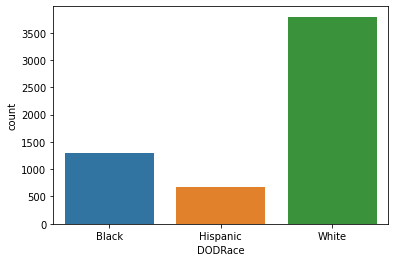

In [34]:
sns.countplot(df.DODRace);

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [36]:
X = df.drop("DODRace",axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = df.DODRace

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

In [54]:
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(4615, 232) (1154, 232) (4615,) (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [57]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=5000,random_state=101))]
lr_model = Pipeline(steps=operations)

In [58]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [59]:
lr_model.fit(X_train,y_train)
eval_metric(lr_model, X_train, y_train, X_test, y_test)

Test_Set
[[242  12   6]
 [  9 100  27]
 [ 24  99 635]]
              precision    recall  f1-score   support

       Black       0.88      0.93      0.90       260
    Hispanic       0.47      0.74      0.58       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 970   36   32]
 [  20  460   63]
 [  64  353 2617]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [60]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [69]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=5000,random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.613
test_precision_Hispanic   0.503
test_recall_Hispanic      0.786
dtype: float64

### Logistic Model GridsearchCV

In [73]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])
recall_Hispanic

make_scorer(recall_score, average=None, labels=['Hispanic'])

In [74]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [75]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=5000,random_state=101))]
model = Pipeline(steps=operations)

lr_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [76]:
lr_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=5000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [71]:
lr_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [72]:
lr_model_grid.best_score_

0.7900781515460414

In [78]:
eval_metric(lr_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[242  12   6]
 [  9 100  27]
 [ 24  99 635]]
              precision    recall  f1-score   support

       Black       0.88      0.93      0.90       260
    Hispanic       0.47      0.74      0.58       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 970   36   32]
 [  20  460   63]
 [  64  353 2617]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



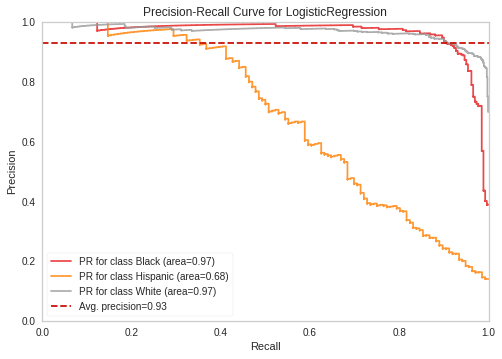

In [79]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=5000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [81]:
y_pred = lr_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [82]:
svc_model = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=svc_model)

In [83]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  7 101  28]
 [ 21 129 608]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.42      0.74      0.53       136
       White       0.95      0.80      0.87       758

    accuracy                           0.82      1154
   macro avg       0.75      0.82      0.77      1154
weighted avg       0.87      0.82      0.84      1154


Train_Set
[[ 962   34   42]
 [  21  454   68]
 [  59  433 2542]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.89      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [87]:
model = Pipeline(steps=svc_model)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.572
test_precision_Hispanic   0.452
test_recall_Hispanic      0.781
dtype: float64

###  SVC Model GridsearchCV

In [88]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [89]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
model = Pipeline(steps=svc_model)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [90]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [91]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

In [92]:
svm_model_grid.best_score_

0.7808019028202514

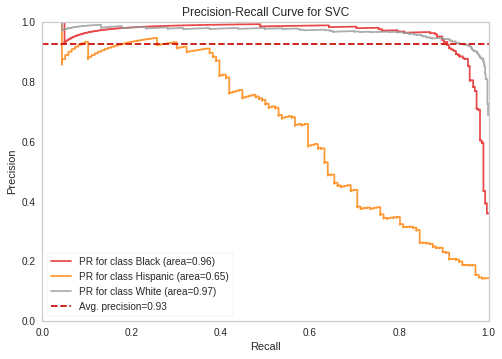

In [93]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [94]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [97]:
X2 = df.drop("DODRace",axis=1)
y = df.DODRace

In [98]:
categoric = X2.select_dtypes("object").columns
categoric

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [99]:
enc = OrdinalEncoder()
X2[categoric] = enc.fit_transform(X2[categoric])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,0.000,41.000,26,2.000
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,0.000,18.000,21,2.000
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,0.000,119.000,23,2.000
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,0.000,30.000,22,2.000
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,0.000,119.000,45,2.000


In [102]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

In [103]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [113]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [114]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [115]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[182   1  77]
 [  7   7 122]
 [  8   2 748]]
              precision    recall  f1-score   support

       Black       0.92      0.70      0.80       260
    Hispanic       0.70      0.05      0.10       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.80      0.58      0.59      1154
weighted avg       0.81      0.81      0.77      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [116]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.081
test_precision_Hispanic   0.567
test_recall_Hispanic      0.044
dtype: float64

### RF Model GridsearchCV

In [110]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[8,10,12,14]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [111]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [112]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 14],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [117]:
rf_grid_model.best_params_

{'max_depth': 8, 'n_estimators': 400}

In [118]:
rf_grid_model.best_score_

0.3589704383282365

In [119]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[211  14  35]
 [ 14  60  62]
 [ 30  91 637]]
              precision    recall  f1-score   support

       Black       0.83      0.81      0.82       260
    Hispanic       0.36      0.44      0.40       136
       White       0.87      0.84      0.85       758

    accuracy                           0.79      1154
   macro avg       0.69      0.70      0.69      1154
weighted avg       0.80      0.79      0.79      1154


Train_Set
[[ 980    7   51]
 [   7  481   55]
 [  51  157 2826]]
              precision    recall  f1-score   support

       Black       0.94      0.94      0.94      1038
    Hispanic       0.75      0.89      0.81       543
       White       0.96      0.93      0.95      3034

    accuracy                           0.93      4615
   macro avg       0.88      0.92      0.90      4615
weighted avg       0.93      0.93      0.93      4615



In [120]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[211  14  35]
 [ 14  60  62]
 [ 30  91 637]]
              precision    recall  f1-score   support

       Black       0.83      0.81      0.82       260
    Hispanic       0.36      0.44      0.40       136
       White       0.87      0.84      0.85       758

    accuracy                           0.79      1154
   macro avg       0.69      0.70      0.69      1154
weighted avg       0.80      0.79      0.79      1154


Train_Set
[[ 980    7   51]
 [   7  481   55]
 [  51  157 2826]]
              precision    recall  f1-score   support

       Black       0.94      0.94      0.94      1038
    Hispanic       0.75      0.89      0.81       543
       White       0.96      0.93      0.95      3034

    accuracy                           0.93      4615
   macro avg       0.88      0.92      0.90      4615
weighted avg       0.93      0.93      0.93      4615



In [121]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [122]:
xgb_model = XGBClassifier(random_state=101)

In [123]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [124]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)

XGBClassifier(objective='multi:softprob', random_state=101)

In [125]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[232  17  11]
 [ 11  93  32]
 [ 25 110 623]]
              precision    recall  f1-score   support

       Black       0.87      0.89      0.88       260
    Hispanic       0.42      0.68      0.52       136
       White       0.94      0.82      0.88       758

    accuracy                           0.82      1154
   macro avg       0.74      0.80      0.76      1154
weighted avg       0.86      0.82      0.83      1154


Train_Set
[[ 979   21   38]
 [  17  464   62]
 [  97  315 2622]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1038
    Hispanic       0.58      0.85      0.69       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.90      0.88      0.89      4615



In [126]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.504
test_precision_Hispanic   0.426
test_recall_Hispanic      0.621
dtype: float64

### XGBoost Model GridsearchCV

In [127]:
comp = pd.DataFrame(classes_weights)

comp["label"]= y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0    
Black     1.482    1038
Hispanic  2.833     543
White     0.507    3034
Name: 0, dtype: int64

In [128]:
param_grid = {"n_estimators":[200, 400],
              'max_depth':[4,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [129]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [130]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 200,
 'subsample': 1}

In [131]:
xgb_grid_model.best_score_

0.5468909276248726

In [132]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[235  13  12]
 [ 10  87  39]
 [ 16  59 683]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       260
    Hispanic       0.55      0.64      0.59       136
       White       0.93      0.90      0.92       758

    accuracy                           0.87      1154
   macro avg       0.79      0.81      0.80      1154
weighted avg       0.88      0.87      0.87      1154


Train_Set
[[1032    1    5]
 [   0  541    2]
 [  12   58 2964]]
              precision    recall  f1-score   support

       Black       0.99      0.99      0.99      1038
    Hispanic       0.90      1.00      0.95       543
       White       1.00      0.98      0.99      3034

    accuracy                           0.98      4615
   macro avg       0.96      0.99      0.98      4615
weighted avg       0.98      0.98      0.98      4615



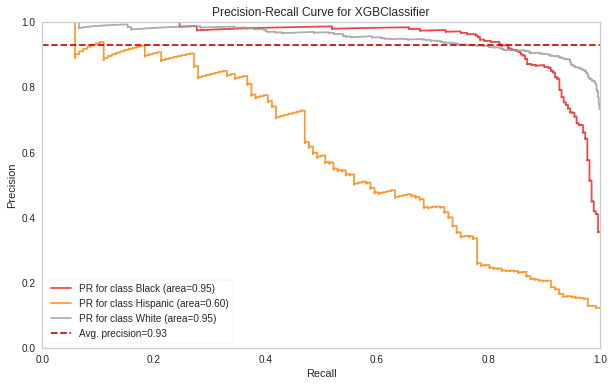

In [133]:
model = XGBClassifier(random_state=101, colsample_bytree=0.5, subsample=0.5)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [150]:
!pip install imblearn

In [151]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [152]:
over = SMOTE(sampling_strategy={"Hispanic": 1200})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [154]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [155]:
y_resampled_over.value_counts()

White       3034
Hispanic    1200
Black       1038
Name: DODRace, dtype: int64

In [156]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [157]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [158]:
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [159]:
y_resampled.value_counts()

White       2500
Hispanic    1200
Black       1038
Name: DODRace, dtype: int64

In [160]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## SVC Over/Under Sampling

In [141]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("svc", SVC(class_weight='balanced',max_iter=5000,random_state=101))]

In [161]:
smote_pipeline = imbpipeline(steps=operations)

In [162]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('svc',
                 SVC(class_weight='balanced', max_iter=5000,
                     random_state=101))])

In [163]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  9  92  35]
 [ 22  74 662]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.68      0.59       136
       White       0.94      0.87      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.82      0.80      1154
weighted avg       0.88      0.86      0.87      1154


Train_Set
[[ 967   29   42]
 [  31  397  115]
 [  66  282 2686]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.56      0.73      0.63       543
       White       0.94      0.89      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.80      0.85      0.82      4615
weighted avg       0.89      0.88      0.88      4615



In [164]:
model = smote_pipeline = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.589
test_precision_Hispanic   0.535
test_recall_Hispanic      0.659
dtype: float64

## Xgboost Over/ Under Sampling

In [166]:
operations_Xgboost = [('o', over), ('u', under),  
              ("Xgboost", XGBClassifier(class_weight='balanced'))]

In [167]:
smote_pipeline = imbpipeline(steps=operations_Xgboost)

In [168]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('Xgboost',
                 XGBClassifier(class_weight='balanced',
                               objective='multi:softprob'))])

In [169]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[218  12  30]
 [  9  73  54]
 [  8  52 698]]
              precision    recall  f1-score   support

       Black       0.93      0.84      0.88       260
    Hispanic       0.53      0.54      0.53       136
       White       0.89      0.92      0.91       758

    accuracy                           0.86      1154
   macro avg       0.78      0.77      0.77      1154
weighted avg       0.86      0.86      0.86      1154


Train_Set
[[ 909   22  107]
 [  19  350  174]
 [  29  118 2887]]
              precision    recall  f1-score   support

       Black       0.95      0.88      0.91      1038
    Hispanic       0.71      0.64      0.68       543
       White       0.91      0.95      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.86      0.82      0.84      4615
weighted avg       0.90      0.90      0.90      4615



In [170]:
model = smote_pipeline = imbpipeline(steps=operations_Xgboost)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.522
test_precision_Hispanic   0.558
test_recall_Hispanic      0.494
dtype: float64

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [171]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.5872927756520007

In [172]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.5865389656920146

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [173]:
!pip install shap

     |████████████████████████████████| 564 kB 5.5 MB/s 


In [175]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [191]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=5000, random_state=101, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, penalty='l1',
                   random_state=101, solver='saga')

In [192]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[244  10   6]
 [  8 100  28]
 [ 26  90 642]]
              precision    recall  f1-score   support

       Black       0.88      0.94      0.91       260
    Hispanic       0.50      0.74      0.60       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 974   33   31]
 [  18  460   65]
 [  69  347 2618]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.55      0.85      0.67       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [193]:
import shap
explainer = shap.Explainer(model_shap,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [194]:
shap_values

[array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -6.64735877e+00,  0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -7.10949566e-01,
         -4.76846707e+01, -0.00000000e+00, -4.45109324e-01,
         -2.42996494e+01, -1.23872482e+01,  2.75728040e-01,
          0.00000000e+00, -8.93154890e+00,  0.00000000e+00,
         -9.58467615e+01, -0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00, -3.08837305e+01, -1.00974229e+01,
         -5.84760406e+01, -0.00000000e+00, -7.95195626e+00,
          0.00000000e+00,  4.14623732e+00,  7.39561358e-01,
          4.40185728e+00,  6.51412854e+00,  0.00000000e+00,
         -1.07166910e+01, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -2.73430043e+01,  0.00000000e+00,
         -1.41490082e+01, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -2.43167667e+01,  4.17766055e+00,
         -7.17894925e-01, -0.00000000e+00, -2.66668954e+01,
         -3.41022081e+01, -4.88071828e+0

In [195]:
print(shap_values[0].shape)

(1, 232)


In [196]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = lr_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

The log_model predicted: White


In [197]:
explainer.expected_value[1]

-789.9179015204386

In [198]:
X_test_scaled[203]

array([0.35810811, 0.50837989, 0.57638889, 0.55474453, 0.52138493,
       0.38333333, 0.46808511, 0.42696629, 0.47810219, 0.55151515,
       0.48387097, 0.52777778, 0.46610169, 0.46896552, 0.44      ,
       0.52649007, 0.38202247, 0.53588517, 0.4501992 , 0.44      ,
       0.51750973, 0.51698113, 0.56666667, 0.45865633, 0.48356808,
       0.51581028, 0.47268409, 0.57055215, 0.46666667, 0.33333333,
       0.4       , 0.23809524, 0.72463768, 0.56589147, 0.28571429,
       0.42477876, 0.42405063, 0.45544554, 0.46517413, 0.4612069 ,
       0.51143451, 0.34210526, 0.38636364, 0.36904762, 0.36956522,
       0.52631579, 0.52830189, 0.42068966, 0.26666667, 0.46889952,
       0.44827586, 0.49885584, 0.32692308, 0.42553191, 0.35797665,
       0.512     , 0.50194553, 0.57024793, 0.32608696, 0.4483871 ,
       0.30769231, 0.31380753, 0.44871795, 0.45522388, 0.30434783,
       0.45454545, 0.4591195 , 0.44833948, 0.51973684, 0.35897436,
       0.61245675, 0.48578199, 0.52173913, 0.45112782, 0.51736

In [200]:
explainer = shap.Explainer(model_shap, X_train_scaled)

In [201]:
shap_values = explainer.shap_values(X_test_scaled)

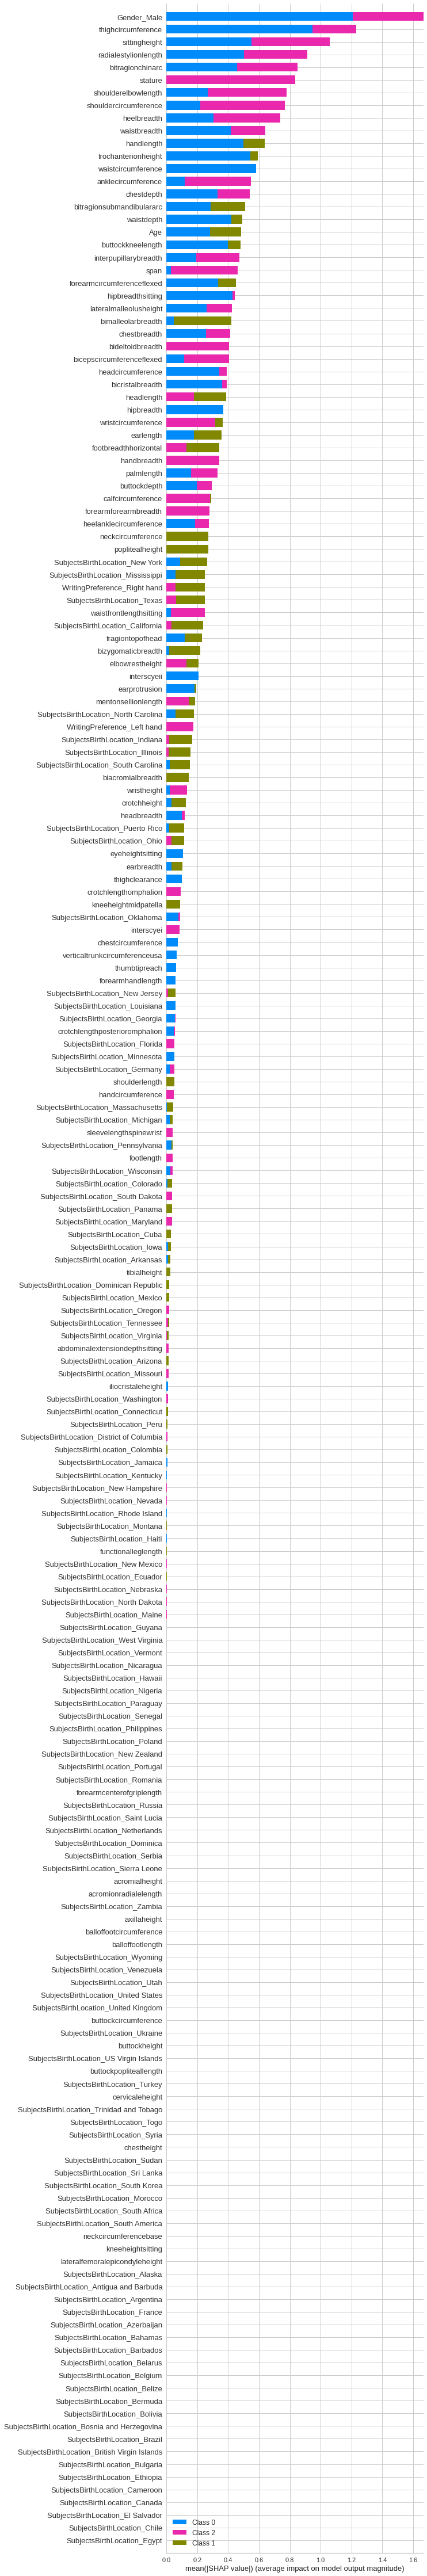

In [202]:
shap.summary_plot(shap_values, X_train,max_display=200,feature_names = X.columns)

In [207]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [212]:
X3 = df[hispanic]
X3

,SubjectsBirthLocation,handlength,forearmcircumferenceflexed,headlength,bitragionsubmandibulararc,footbreadthhorizontal,bimalleolarbreadth,poplitealheight,waistdepth,WritingPreference,tragiontopofhead,bideltoidbreadth,neckcircumferencebase,biacromialbreadth,buttockheight,buttockkneelength,earlength,axillaheight,Age
0,Germany,184,265,191,301,91,65,362,217,Right hand,110,466,368,373,836,587,65,1180,26
1,California,189,247,180,270,91,64,426,168,Right hand,125,430,345,372,900,583,60,1292,21
2,Texas,195,262,207,270,100,69,398,159,Right hand,129,450,369,397,861,583,65,1271,23
3,District of Columbia,186,309,206,294,97,68,394,235,Right hand,125,484,386,384,897,599,62,1250,22
4,Texas,187,260,181,295,88,67,345,300,Right hand,116,525,358,378,811,607,65,1210,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,Colorado,182,277,187,301,95,70,418,210,Right hand,140,457,427,384,878,587,61,1263,22
6064,Oklahoma,191,327,196,316,103,76,447,235,Right hand,135,536,430,428,899,632,60,1346,22
6065,Oklahoma,183,312,194,316,101,74,407,258,Right hand,127,501,444,407,857,614,62,1280,23
6066,Oklahoma,192,299,197,327,98,75,432,192,Right hand,118,493,414,419,898,598,61,1314,22


In [213]:
X3 = pd.get_dummies(X3, drop_first=True)
y = df.DODRace

In [214]:
X3.shape

(5769, 154)

In [216]:
y.shape

(5769,)

In [217]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

In [218]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

In [219]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [220]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[219   7  34]
 [  8  99  29]
 [ 98 140 520]]
              precision    recall  f1-score   support

       Black       0.67      0.84      0.75       260
    Hispanic       0.40      0.73      0.52       136
       White       0.89      0.69      0.78       758

    accuracy                           0.73      1154
   macro avg       0.66      0.75      0.68      1154
weighted avg       0.79      0.73      0.74      1154


Train_Set
[[ 877   49  112]
 [  34  436   73]
 [ 367  492 2175]]
              precision    recall  f1-score   support

       Black       0.69      0.84      0.76      1038
    Hispanic       0.45      0.80      0.57       543
       White       0.92      0.72      0.81      3034

    accuracy                           0.76      4615
   macro avg       0.68      0.79      0.71      4615
weighted avg       0.81      0.76      0.77      4615



In [221]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.543
test_precision_Hispanic   0.425
test_recall_Hispanic      0.755
dtype: float64

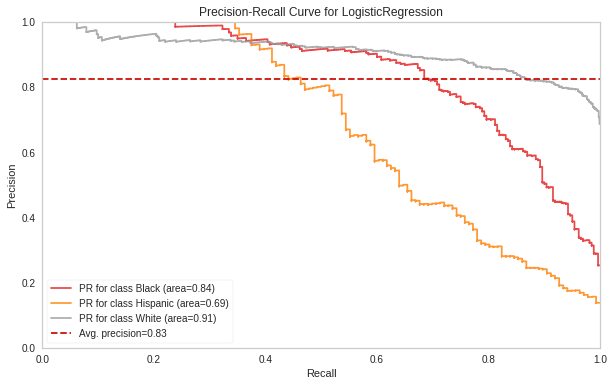

In [222]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [223]:
y2 = y.map({"Hispanic":1, "White":0, "Black":0})

In [224]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y2, test_size=0.2, random_state=101, stratify =y2)

<IPython.core.display.Javascript object>

In [225]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_shap_model2 = Pipeline(steps=operations)

In [226]:
pipe_shap_model2.fit(X_train4, y_train4)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [227]:
eval_metric(pipe_shap_model2, X_train4, y_train4, X_test4, y_test4)

Test_Set
[[842 176]
 [ 27 109]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1018
           1       0.38      0.80      0.52       136

    accuracy                           0.82      1154
   macro avg       0.68      0.81      0.71      1154
weighted avg       0.90      0.82      0.85      1154


Train_Set
[[3373  699]
 [  89  454]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      4072
           1       0.39      0.84      0.54       543

    accuracy                           0.83      4615
   macro avg       0.68      0.83      0.72      4615
weighted avg       0.91      0.83      0.85      4615



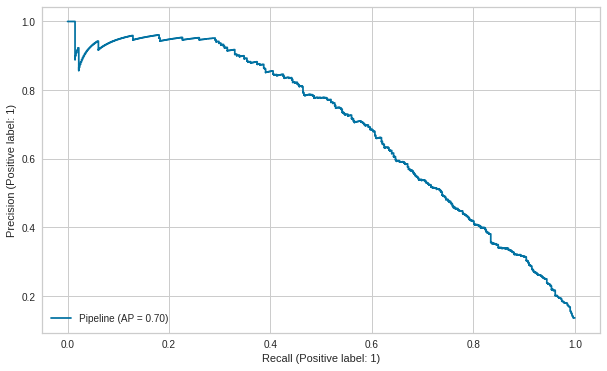

In [228]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(max_iter=10000,random_state=101))]
log_basic_model = Pipeline(steps=operations)

log_basic_model.fit(X_train4, y_train4)
plot_precision_recall_curve(log_basic_model, X_train4, y_train4);

In [229]:
y_pred_proba = log_basic_model.predict_proba(X_train4)
average_precision_score(y_train4, y_pred_proba[:,1])

0.6951385199431086

In [230]:
precisions, recalls, thresholds = precision_recall_curve(y_train4, y_pred_proba[:,1])

In [231]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3244336160796304

In [232]:
y_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_test4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [233]:
print(confusion_matrix(y_test4,y_pred2))
print(classification_report(y_test4,y_pred2))

[[707 311]
 [ 15 121]]
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      1018
           1       0.28      0.89      0.43       136

    accuracy                           0.72      1154
   macro avg       0.63      0.79      0.62      1154
weighted avg       0.90      0.72      0.77      1154



In [234]:
y_train_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_train4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train4, y_train_pred2))
print(classification_report(y_train4, y_train_pred2))

[[2843 1229]
 [  38  505]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      4072
           1       0.29      0.93      0.44       543

    accuracy                           0.73      4615
   macro avg       0.64      0.81      0.63      4615
weighted avg       0.90      0.73      0.77      4615



In [235]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [236]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)
CV(10, model, X_train4, y_train4, optimal_threshold)

Accuracy      71.70%  std 2.08%
Precision-1   28.17%  std 1.60%
Recall-1      90.06%  std 3.29%
F1_score-1    42.88%  std 1.90%


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___